# Fundamentals of Data Analysis Project - 2018: The Boxplot



## 1. Introduction

In this project, i will examine the history of the boxplot, explain how it is created and demonstrate its use. I will also examine limitations of the boxplot and improvements made. 

The boxplot was invented by John W. Tuckey and officially introduced in his 1977 work *Exploratory Data Analysis* (Wickham and  Stryjewski, 2011, p. 1). The boxplot presents the summary statistics of a dataset and, along with his other famous plot, the stem and leaf plot, is a key component of **Exploratory Data Analysis** (EDA). 

EDA is a type of analysis which puts on emphasis on visualising a dataset in an attempt to understand it, before moving onto more traditional hypotheses formulation and testing. 

As boxplots are an important tool for EDA, i will first explain what EDA is by using Tuckey's **Detective and Prosecutor** analogy. I will then look at the key **characteristics** of EDA and follow up with an examination of the **Five Number Summary** on which the boxplot is based. 

**Boxplots** will then be created and discussed, followed by **limitations** of the plot. Finally, an improvement called the **Violinplot** will be shortly described. 

Before, we continue, the required Python Libraries will be loaded below. Make sure to run the below cell, before proceeding through the notebook.

In [1]:
import numpy as np
import pandas as pd 
import stemgraphic
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


## 2. Detective and Prosecutor

In this section, i will introduce EDA using the detective analogy. The boxplot is a key graphical tool for EDA. 

Tuckey (1977, p. 3) uses the analogy of a Detective and a Trial to explain the difference between **Exploratory Data Analysis** (EDA) and traditional **Confirmatory Data Analysis (CDA)**. The detective must investigate the evidence (data) and search for clues (clusters, variance, outliers etc.). 

A good detective should have no fixed hypotheses before starting the investigation and should be willing to follow the data where it takes him. He should also be able to examine the evidence as a whole and have the ability to spot interesting characteristics of the data, such as outliers, trends or clusters. 

The detective provides the evidence and the trial must then confirm if it is true or not. The prosecutor makes a hypothesis based on the evidence provided by detective. He tries his case (experiment) and the jury is the statistical test, which confirms or rejects the hypothesis (Behrens, 1997, p.131). 

Both EDA and CDA are integral elements of data analysis, but Tuckey emphasised that CDA cannot proceed unless and until EDA has finished finding the evidence. 

## 3. Characteristics of Exploratory Data Analysis 

We have already seen that EDA is the preliminary exploration of the data. I will now explain the 5 major major characteristics of EDA in more detail, including the importance of plots (Behrens, 1997, p. 131). They major features are as follows:

1. **Visualisation of the Data**

2. **Iterative Process**

3. **Robust Statistics**
    
    
    

### Visualisation of Data

Graphical visualisation is the first and most important step in EDA (Tuckey, 1977).  

The first step in EDA is to plot all the data points directly, using a stem and leaf plot, a dot plot or similar.  These plots will help the researcher spot the unexpected and, as Tuckey (1977, p.vi) points out: *'The greatest value of a picture is when it forces us to notice what we never expected to see.'* These plots allow one to look at the distribution, the spread, clusters and outliers in the data. 

The second step in graphical representation is summarising the data. If one wants to understand the key characteristics of a dataset or compare the distributions across several, the box plot is particularly suitable (Behrens, 1997, p.136). 





### Iterative Process. 

Behrens (1997, p. 139) notes that the framework of EDA is data = fit + residual or, in graphical terms, data = smooth + rough. 

EDA is a cyclical process whereby a researcher, visualises the data; attempts to fit a model ie. summarise the data; checks for residuals ie. deviations or outliers; and then attempts to improve on the model. 

By iterating through this process, the researcher will come to a good quantitative description of the data. 

Behrens (1997, p. 140) also points out that a boxplot is a perfect demonstration of the process. It shows the fit of the data (median and quartiles) as well as the residuals (the variance and outliers).

### Robust Statistics

Finally, when attempting to summarise a dataset, EDA prefers to use numbers from the dataset, eg. the median and min/max instead of the mean. The goal is to accurately describe the fit and the residuals of a dataset and statistics like the mean which can be 'easily fooled' are replaced by the median which is not sensitive to outliers Behrens (1997, p. 143).

Tuckey (1977, p. 34) recommends the **Five Number Summary** as the most appropriate quantitative summary of a dataset. The boxplot is the graphical representation of the Five Number Summary. We will look at this in detail next. 




## 4. Five Number Summary

![Box plot: Five Number Summary](https://github.com/dermotkel/fundamentals-project/blob/master/boxplt.jpg?raw=true "Box plot: Five Number Summary")

The important parts of the boxplot (above) are explained below:

1. The Minimum is the smallest value in the dataset (0/4)
2. The 2nd Quartile (2QR) is the middle number between the Minimum and the median (1/4)
3. The Median is the middle value of the dataset or the mean of the two middle values if there is no middle number (2/4)
4. The 3rd Quartile (3QR) is the middle number between the median and the maximum (3/4)
5. The Maximum is the highest value in the dataset (4/4)
6. Outliers - values at least 1.5 times the IQR from either hinge.

Tuckey (1977, p. 44) calls the 2QR and and the 3QR 'hinges'. The middle half of the data are contained between the hinges. This is generally referred to as the interquartile range (IQR). Tuckey sets up 'fences' 1.5 times the IQR to the left of the 2QR and to the right of the 3QR. If any value falls outside of these fences, they are regarded as 'far out'. 

These outliers should be treated with suspicion and may be the result of human error or a datapoint from a different dataset.  


 ## 5. Boxplots

As we have seen, a box plot is a graphical representation of the Five Number Summary. A boxplot can provide the key characteristics of a very large dataset in one simple visual representation: The smallest and biggest values, the middle point of the data and its spread.  

We will now create two different random datasets with different means and variances. One of the datasets will have an outlier. I will then visualise them using boxplots.

In [3]:
th = np.random.normal(100, 20, size=499) # This dataset has a smaller mean and is 'thinner', it has less spread. 
thin = []                                # Both datasets normally distributed and generated randomly. 
for i in th:
 y = np.rint(i) # The numpy random normal function creates floats, all numbers in the dataset are rounded to the nearest integer. 
 thin.append(y)



wi = np.random.normal(150, 50, size=500) # This dataset has a higher mean and is wider with more spread.
wide = []
for i in wi:
 y = np.rint(i)
 wide.append(y)
    






An outlier is created in the below cell and added to the thin dataset. The 'fence' is calculated by calculating 1.5 times the IQR and adding it to the second hinge (3QR) of the boxplot. 100 is added to the fence to make sure that the outlier appears far from the boxplot. 

In [11]:
outlier = np.rint(np.percentile(thin, 75) + (100 + (stats.iqr(thin))*1.5))
thin.append(outlier) # The outlier is added to the thin dataset

In [12]:
thin = pd.DataFrame(thin) # thin is converted from a list to a Pandas DataFrame
thin.columns = ['Number']





In the below cell, categorical variables: 'thin' and 'wide' are created and added to their respective datasets. The thin and wide datasets are joined together. The categorical variables will allow us to select the two variables and plot them separately. 

In [13]:
thin_cat = []
for i in range(500):
    thin_cat.append('thin') # A list of 500 categorical variables is created. 

thin_cat = pd.DataFrame(thin_cat, dtype="category")
thin_cat.columns = ['Category']

thin = pd.DataFrame(thin)
thin.columns = ['Number']

thin = thin_cat.join(thin) # The categorical are numerical variables are joined together. 

wide_cat = []
for i in range(500):
    wide_cat.append('wide')

wide_cat = pd.DataFrame(wide_cat, dtype="category")
wide_cat.columns = ['Category']

wide = pd.DataFrame(wide)
wide.columns = ['Number']

wide = wide_cat.join(wide)


thin_wide = pd.concat([thin, wide]) # The thin and wide datasets are combined creating our final datasets.
                                    







The two datasets created above are plotted below. They are randomly generated, so will change if you re run the above cells. 
The differences between both datasets are clear:
- The median of both datasets is significantly different.
- The box and whiskers of the thin plot are much smaller. The wide dataset has much greater variation.
- The extreme outlier around 250 is clearly visible (represented by a black diamond). Other outliers may also be visible. 

The boxplot below allows us to quickly see the major difference between two very large datasets.

Text(0,0.5,'Quantity')

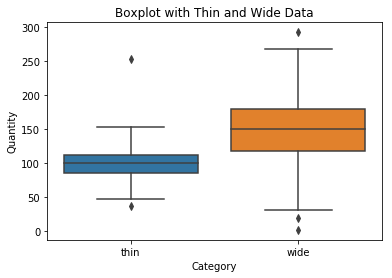

In [15]:
sns.boxplot(data=thin_wide,x="Category",y='Number')
plt.title('Boxplot with Thin and Wide Data')
plt.xlabel('Category')
plt.ylabel('Quantity')

### Skewed Data

A boxplot can also help us see if data is skewed ie. If it is clustered in one part of the dataset. The code below creates a normal distribution with a mean of 100. Another large dataset of random numbers between 10 and 20 is also created and added to the original dataset. 

This results in a large cluster of variables  to the left of the boxplot between 10 and 20. 



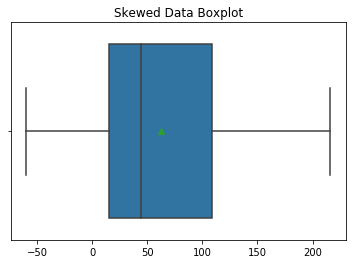

In [7]:
x = np.random.normal(100, 50, size=300) # Normal distribution created
y = []
for i in x:
 q = np.rint(i)
 y.append(q)

for i in range(200):
    i = np.random.randint(10,20) # A large cluster of numbers are added to the dataset. 
    y.append(i)
    

y = pd.Series(y)
    
sns.boxplot(y, showmeans=True)
plt.title('Skewed Data Boxplot')
plt.show()




Each of the four quartiles of the data contains an equal number of variables in the dataset. The 2QR (Between the first hinge and the median is much thinner than the others, suggesting a large quantity of variables in the 10 to 20 range, as we created. 

The dataset is right skewed, suggesting that there is less variance in the data to the left of the median. The mean (green triangle is being pulled to the right, typical of a skewed dataset. 

While the boxplot does show the distribution and suggest clustering, the histogram below shows the cluster and skew much more clearly. 

Boxplots are ideal for quickly comparing datasets and showing the media, but they are less ideal for showing the actual distribution of the dataset. 

C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


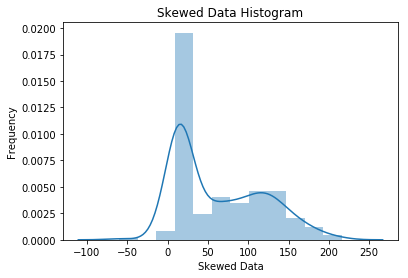

In [8]:
sns.distplot(y)
plt.title('Skewed Data Histogram')
plt.xlabel('Skewed Data')
plt.ylabel('Frequency')
plt.show()

## 6. Limitations with Boxplot

Tuckey (1977, p. 27) emphasised that while, 'Summaries can be very useful, but they are not the details.' The boxplot is useful but should always be preceded with a plot showing all of the data 

Tuckey invented the Stem and Leaf plot to show th details. We can also use a histogram and swarmplot to show similar detail. 

### Stem and Leaf Plot 

A normal distribution with a mean of 20 is created. The first part of the number (stem) is on the left of the line. The second part of the number (leaf) is on the right

* 2|3 = 23
* 4|0667 = 40, 46, 46, 47

Each datapoint is shown in the stem and leaf plot. You can clearly see in the plot below that this is a normal distributed as it is peaked in the middle and is symmetrical




In [4]:
x = np.random.normal(20, 20, size=100) # normal distribution is created
q = []
for i in x:
 y = np.rint(i)
 q.append(y)

 y= pd.Series(q)


C:\Users\dermotkel\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


Text(0.5,1,'Stem and Leaf Plot')

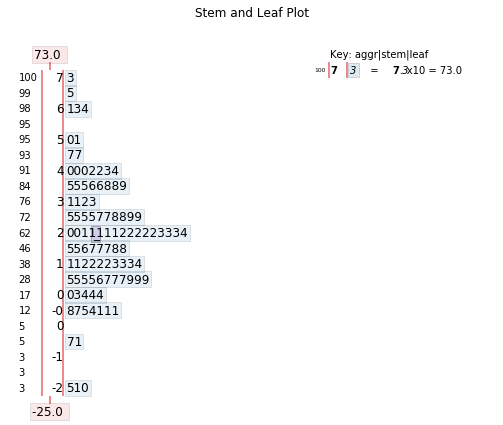

In [5]:
fig, ax = stemgraphic.stem_graphic(y) # Derived from #https://stackoverflow.com/questions/45655321/is-there-a-pandas-function-for-creating-a-stem-and-leaf-plot/45656792#45656792

plt.savefig('fig.png',bbox_inches='tight') 
plt.title('Stem and Leaf Plot')

### Importance of Detail 

The below boxplot shows the salaries of staff of the Trump Whitehouse in 2017. It looks to have a normal distribution and no outliers. It is unusual however, as it suggests that many staff earn below $50,000. 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dermotkel/fundamentals-project/master/white-house-salaries.csv", delimiter=";")


In [3]:

trump = df.loc[df['Year'] == 2017]

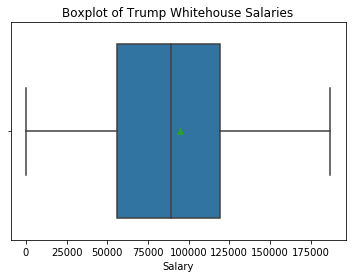

In [4]:
sns.boxplot(trump['Salary'], showmeans=True)
plt.title('Boxplot of Trump Whitehouse Salaries')
plt.show()


The swarmplot below shoes the detail and we can immediately see something interesting. Three staff members take no salary. In reality, very few staff members earn less than $50,000. The boxplot hid this detail and, as Tuckey suggests, one should also look at all datapoints to ensure that one gets a strong understanding of the data.  

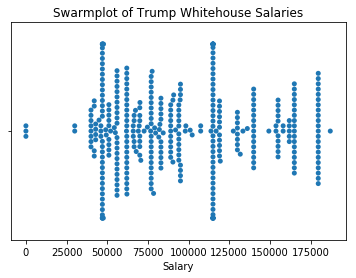

In [5]:
sns.swarmplot(x='Salary', data=trump)
plt.title('Swarmplot of Trump Whitehouse Salaries')
plt.show()

## 6. Violinplot

The swarmplot put over the boxplot below does show extra detail, but is cluttered. It can be 

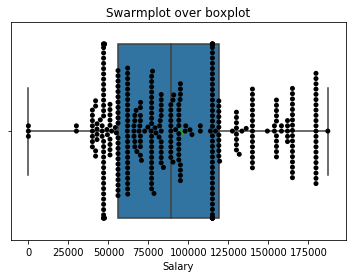

In [6]:
sns.boxplot(trump['Salary'], showmeans=True)
sns.swarmplot(x='Salary', data=trump, color="black")
plt.title('Swarmplot over boxplot')
plt.show()

The violinplot below shows the five number summary, similar to the boxplot. The min and max are on either end of the plot. The thick black bar in the middle shows the IQR. Each end of the line is the hinge of a boxplot. The white dot in the middle is the median.  

Instead of an arbitrary box shape, the plot is in the shape of a Kernal Density Estimation (KDE) plot. This is similar to a smooth histogram. The violinplot plot, therefore, shows the Five Number Summary and the distribution of the data.

The Violinplot of the Trump Salary data, shows that the left side of the plot is very thin, compared to the centre and the right-hand side. This suggests that there are very few low earners and provides much more detail than the standard boxplot. 

C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Violinplot')

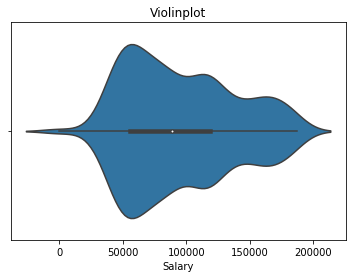

In [7]:
sns.violinplot(x='Salary', data=trump)
plt.title('Violinplot')